In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

# Define Alexnet Model
AlexNet = Sequential()

AlexNet.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(32,32,3), activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

AlexNet.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

AlexNet.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

AlexNet.add(Flatten())
AlexNet.add(Dense(512, activation='relu'))
AlexNet.add(Dropout(0.5))

AlexNet.add(Dense(256, activation='relu'))
AlexNet.add(Dropout(0.5))

AlexNet.add(Dense(10, activation='softmax'))

# Define optimizer
opt = Adam(learning_rate=0.001)

# Compile model with 'sparse_categorical_crossentropy'
AlexNet.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

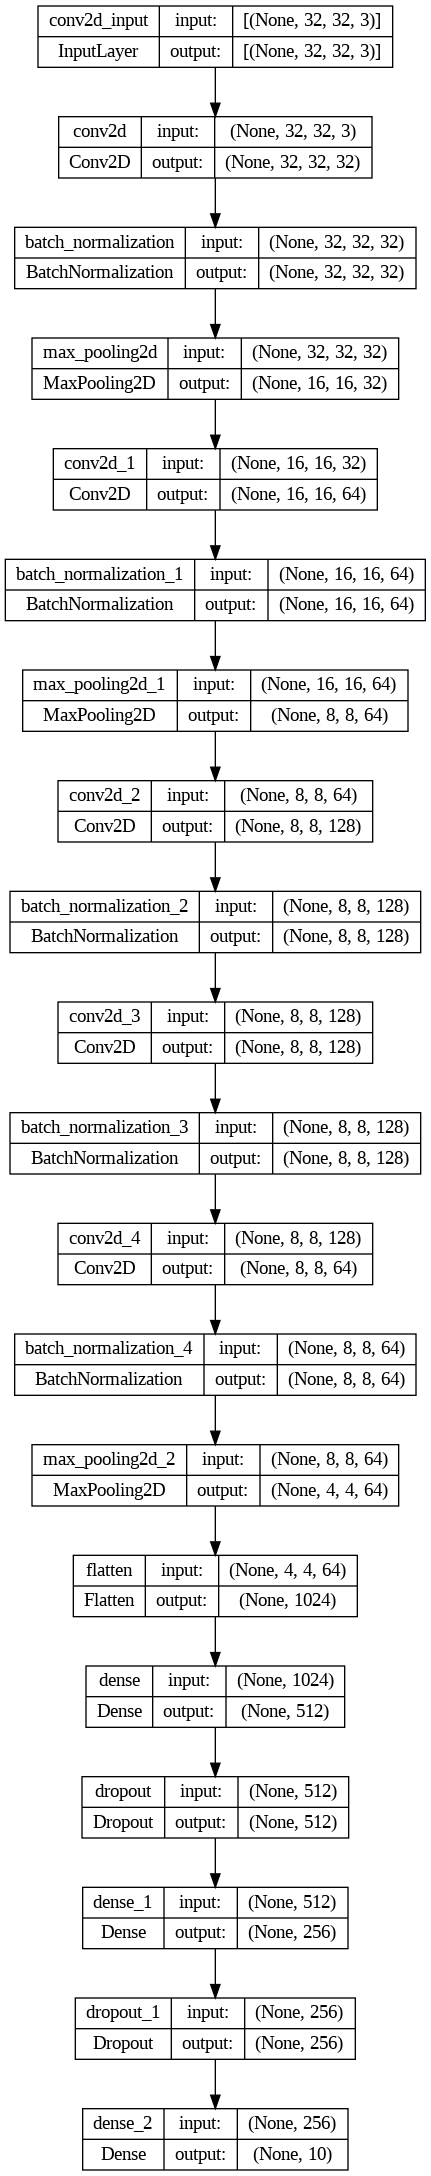

In [10]:
# Visualize the model architecture
keras.utils.plot_model(AlexNet, show_shapes=True)

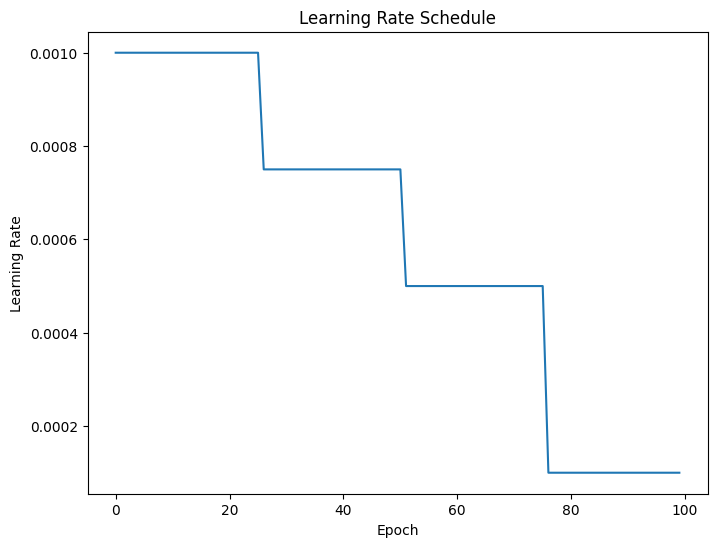

In [11]:
# Define the learning rate schedule
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 75:
        lr *= 0.1
    elif epoch > 50:
        lr *= 0.5
    elif epoch > 25:
        lr *= 0.75
    return lr

# Plot the learning rate schedule
plt.figure(figsize=(8, 6))
plt.plot([lr_schedule(i) for i in range(100)])
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


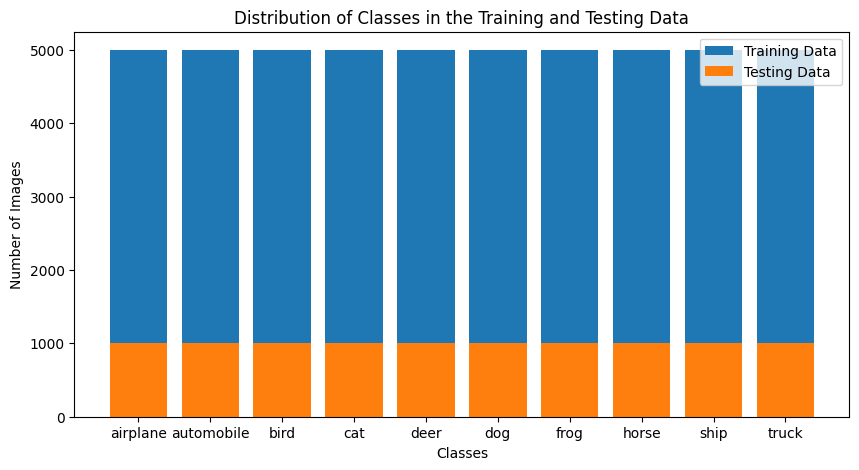

In [12]:
# Plot the distribution of classes in the training and testing data
train_class_dist = np.bincount(y_train)
test_class_dist = np.bincount(y_test)

plt.figure(figsize=(10,5))
plt.bar(np.arange(10), train_class_dist, label='Training Data')
plt.bar(np.arange(10), test_class_dist, label='Testing Data')
plt.xticks(np.arange(10), classes)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in the Training and Testing Data')
plt.legend()
plt.show()